## Thu thập dữ liệu và Giới thiệu về dữ liệu

Bộ dữ liệu nhóm sử dụng là bộ dữ liệu đã được thu thập về AQI (Air Quality Index - Chỉ số chất lượng không khí) ở các nơi khác nhau trong Việt Nam vào năm 2020, dữ liệu có các loại đối tượng được đo lường khác nhau như nhiệt độ, độ ẩm, tốc độ gió,...

Bộ dữ liệu được lấy thông qua trang web https://data.vietnam.opendevelopmentmekong.net/en/dataset/timelines-dataset-on-air-quality-in-vietnam/resource/c3712765-0d13-4d83-8695-fe803a6d9933

----

## Thư viện

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

----

## Khám phá dữ liệu

### Đọc dữ liệu

In [2]:
df = pd.read_csv('aqi_airqualitydata_2020_en.csv',',')
df.head(10)

,Date,Country,City,Specie,count,min,max,median,variance
0,17/07/2020,VN,Ho Chi Minh City,temperature,24,26.0,34.0,29.5,59.13
1,21/10/2020,VN,Ho Chi Minh City,temperature,24,26.0,31.0,27.0,26.23
2,07/11/2020,VN,Ho Chi Minh City,temperature,24,25.0,32.5,28.0,69.20
3,22/11/2020,VN,Ho Chi Minh City,temperature,24,24.0,33.5,26.0,102.39
4,10/01/2020,VN,Ho Chi Minh City,temperature,24,23.5,34.0,28.5,125.65
5,27/01/2020,VN,Ho Chi Minh City,temperature,24,25.0,32.0,26.0,64.40
6,19/03/2020,VN,Ho Chi Minh City,temperature,24,27.0,34.5,28.0,83.97
7,18/05/2020,VN,Ho Chi Minh City,temperature,24,28.5,36.5,31.0,73.87
8,28/05/2020,VN,Ho Chi Minh City,temperature,24,27.0,34.0,28.0,43.58
9,27/08/2020,VN,Ho Chi Minh City,temperature,24,27.0,34.0,30.0,58.37


--------

### Thông tin cơ bản

**Số dòng và cột**

In [3]:
df.shape

(16227, 9)

**Ý nghĩa của từng cột**

In [4]:
df.columns

Index(['Date', 'Country', 'City', 'Specie', 'count', 'min', 'max', 'median',
       'variance'],
      dtype='object')

- **Date**: ngày đo lường
- **Country**: quốc gia
- **City**: thành phố
- **Specie**: đối tượng được đo lường
- **count**: số lần đo lường trong 1 ngày
- **min**: giá trị thấp nhất của đối tượng đo lường trong 1 ngày
- **max**: giá trị cao nhất của đối tượng đo lường trong 1 ngày
- **median**: giá trị trung vị của đối tượng đo lường trong 1 ngày
- **variance**: giá trị phương sai của đối tượng đo lường trong 1 ngày

**Kiểu dữ liệu của từng cột**

In [5]:
df.dtypes

Date         object
Country      object
City         object
Specie       object
count         int64
min         float64
max         float64
median      float64
variance    float64
dtype: object

**Cột bất thường**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16227 entries, 0 to 16226
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      16227 non-null  object 
 1   Country   16227 non-null  object 
 2   City      16227 non-null  object 
 3   Specie    16227 non-null  object 
 4   count     16227 non-null  int64  
 5   min       16227 non-null  float64
 6   max       16227 non-null  float64
 7   median    16227 non-null  float64
 8   variance  16227 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


Có vẻ như không có cột nào bất thường cả vì không có cột nào bị thiếu dữ liệu.

**Dòng bất thường**

In [7]:
df.isnull().sum()

Date        0
Country     0
City        0
Specie      0
count       0
min         0
max         0
median      0
variance    0
dtype: int64

Không có dòng bị thiếu, bất thường.

**Dòng bị lặp**

In [8]:
df.duplicated().sum()

0

----

## Tiền xử lý dữ liệu

**Cột cần loại bỏ**

Vì cột Country chỉ có 1 giá trị duy nhất là VN (dữ liệu này được lấy ở Việt Nam) nên ta sẽ bỏ cột này.

In [9]:
df.drop('Country',axis=1,inplace=True)
df

,Date,City,Specie,count,min,max,median,variance
0,17/07/2020,Ho Chi Minh City,temperature,24,26.0,34.0,29.5,59.13
1,21/10/2020,Ho Chi Minh City,temperature,24,26.0,31.0,27.0,26.23
2,07/11/2020,Ho Chi Minh City,temperature,24,25.0,32.5,28.0,69.20
3,22/11/2020,Ho Chi Minh City,temperature,24,24.0,33.5,26.0,102.39
4,10/01/2020,Ho Chi Minh City,temperature,24,23.5,34.0,28.5,125.65
...,...,...,...,...,...,...,...,...
16222,26/02/2020,Ha Long,co,28,1.0,9.0,4.0,88.19
16223,27/02/2020,Ha Long,co,34,2.0,9.0,8.0,48.52
16224,29/02/2020,Ha Long,co,22,8.0,9.0,8.0,2.27
16225,24/06/2020,Ha Long,co,48,4.0,8.0,5.0,13.36


**Thay đổi kiểu dữ liệu thích hợp cho các cột**

Ta sẽ thay đổi kiểu dữ liệu cho cột date thành kiểu datetime, các cột có kiểu object ta sẽ chuyển thành kiểu string.

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

df['City'] = df['City'].astype('string')

df['Specie'] = df['Specie'].astype('string')

In [12]:
df.dtypes

Date        datetime64[ns]
City                string
Specie              string
count                int64
min                float64
max                float64
median             float64
variance           float64
dtype: object

**Thay đổi khác**

Trong cột Specie, có giá trị trùng tên nhau như: wind-speed và wind speed, wind-gust và wind gust, nên ta sẽ chuyển các Specie này theo 1 tên giống nhau.

In [13]:
df.loc[df['Specie'] == 'wind-speed', 'Specie'] = 'wind speed'
df.loc[df['Specie'] == 'wind-gust', 'Specie'] = 'wind gust'

In [15]:
df[(df['Specie'] == 'wind-speed') | (df['Specie'] == 'wind-gust')]

,Date,City,Specie,count,min,max,median,variance


----

## Khám phá dữ liệu (tiếp theo)

### Phân bố dữ liệu

**Kiểu numerical**

In [16]:
def missing_ratio(col):
    return col.isna().mean() * 100

def first_quartile(col):
    return col.quantile(0.25)

def third_quartile(col):
    return col.quantile(0.75)

In [17]:
num_col_profiles_df = df[['Date','count', 'min', 'max', 'median','variance']]
num_col_profiles_df = num_col_profiles_df.agg([missing_ratio, pd.Series.min, pd.Series.max, pd.Series.mean,
                                               first_quartile, pd.Series.median, third_quartile])
num_col_profiles_df.round(3)

,Date,count,min,max,median,variance
missing_ratio,0.0,0.000,0.000,0.000,0.000,0.000
min,2019-12-30 00:00:00,2.000,-7.000,0.000,-3.000,0.000
max,2021-12-01 00:00:00,72.000,1026.000,1271.000,1028.500,622638.000
mean,2020-07-21 20:07:03.294509312,26.325,126.461,144.628,133.418,1106.045
first_quartile,2020-04-13 00:00:00,16.000,3.000,15.000,7.000,12.570
median,2020-07-18 00:00:00,24.000,18.000,28.000,22.300,51.300
third_quartile,2020-10-21 00:00:00,24.000,40.000,90.550,63.500,427.995


**Kiểu categorical**

In [19]:
cat_col_profiles_df = df[['City', 'Specie']]
cat_col_profiles_df = cat_col_profiles_df.agg([missing_ratio, pd.Series.unique, pd.Series.nunique])
cat_col_profiles_df

,City,Specie
missing_ratio,0.0,0.0
unique,"[Ho Chi Minh City, Hue, Ha Noi, Hai Phong, Ha ...","[temperature, humidity, wind speed, wind gust,..."
nunique,5,14


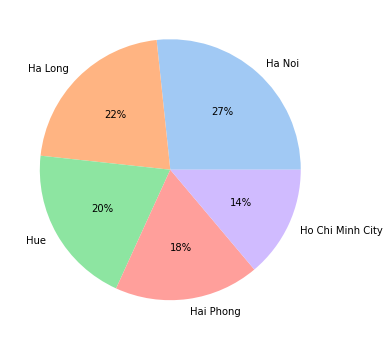

In [20]:
plt.figure(figsize=(6,6))
colors = sns.color_palette('pastel')[0:5]
plt.pie(df['City'].value_counts().values,labels=df['City'].value_counts().index,colors=colors,autopct='%.0f%%');

Dữ liệu được lấy có sự phân bố ở các nơi khá đều nhau.

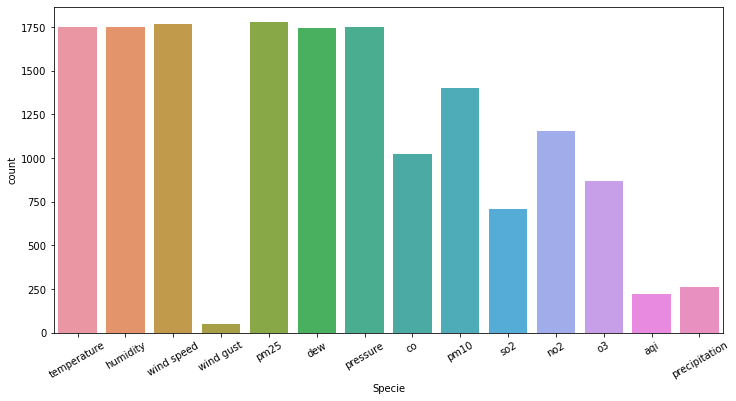

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Specie'])
plt.xticks(rotation=30);

Cột Specie gồm có những giá trị:
   - temperature: nhiệt độ
   - humidity: độ ẩm
   - wind speed: tốc độ gió
   - wind gust: gió giật
   - pm25: bụi mịn 2.5 micron
   - dew: sương mù
   - pressure: áp suất
   - co: khí CO
   - pm10: bụi mịn 1.0 micron
   - so2: khí SO2
   - no2: khí NO2
   - o3: khí O3
   - aqi: chỉ số chất lượng không khí
   - precipitation: giáng thuỷ

<AxesSubplot:xlabel='min', ylabel='max'>

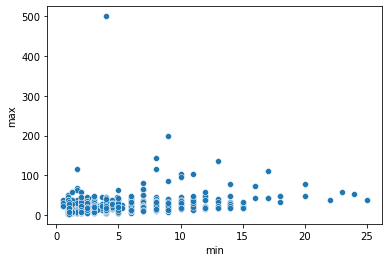

In [115]:
new_df = df[df['Specie']=='o3']
sns.scatterplot(x='min',y='max',data=new_df)

In [130]:
import statsmodels.formula.api as smf

In [137]:
print(smf.ols('Q("min")~Q("max")+Q("median")', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:               Q("min")   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.902e+06
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        08:33:40   Log-Likelihood:                -60042.
No. Observations:               16227   AIC:                         1.201e+05
Df Residuals:                   16224   BIC:                         1.201e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.6235      0.094    -49.438      

In [140]:
print(smf.logit('Q("count")~Q("min")', data=df).fit().summary())

ValueError: endog must be in the unit interval.